In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolAlign, Draw, rdFMCS
import numpy as np

RDKit WARNING: [10:58:30] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
catechol_smiles = 'C1=CC=C(C(=C1)O)O'

In [4]:
#crystal structure drug:
xtal_lig_pdb = Chem.MolFromPDBFile('./catechol_xtal.pdb')

#rdkit mol object of ligand:
rdkit_mol = Chem.MolFromSmiles(catechol_smiles)
rdkit_mol = Chem.AddHs(rdkit_mol)
AllChem.EmbedMolecule(rdkit_mol, clearConfs=False)


#calculate MCS (MCS is the whole thing, but this workflow will also work
#for other ligands sharing a reasonable common substructure)
mcs =rdFMCS.FindMCS([rdkit_mol, xtal_lig_pdb])
smarts = mcs.smartsString
match = Chem.MolFromSmarts(smarts)
test_match_atoms = rdkit_mol.GetSubstructMatch(match)
ref_match_atoms = xtal_lig_pdb.GetSubstructMatch(match)

#Find alignments of all conformers of new drug to old drug:
alignment_score = rdMolAlign.AlignMol(rdkit_mol,
                    xtal_lig_pdb,
                    prbCid=0,
                    atomMap=[[i,j] for i,j in zip(test_match_atoms, ref_match_atoms)])


#0th conformer of rdkit_mol should now be aligned to xtal_lig_pdb.
Chem.MolToPDBFile(rdkit_mol, './catechol_aligned.pdb', confId=int(0))

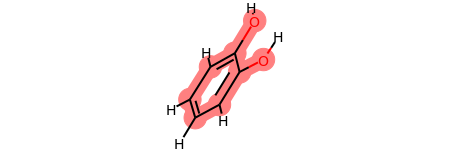

In [5]:
rdkit_mol